In [ ]:
from google.colab import files

uploaded = files.upload()  # Prompts file selection

import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv("network_features.csv")
print("File uploaded successfully. First 5 rows:")
df.head()


Saving network_features.csv to network_features (2).csv
File uploaded successfully. First 5 rows:


,src_ip,dst_ip,protocol,length
0,10.0.2.15,34.144.254.29,6,329
1,34.144.254.29,10.0.2.15,6,60
2,34.144.254.29,10.0.2.15,6,424
3,10.0.2.15,34.144.254.29,6,93
4,34.144.254.29,10.0.2.15,6,60


In [ ]:
df.isnull().sum()  # Check for missing values
df.info()  # Check dataset structure
df.describe()  # Get statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   src_ip    94 non-null     object
 1   dst_ip    94 non-null     object
 2   protocol  94 non-null     int64 
 3   length    94 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


,protocol,length
count,94.000000,94.000000
mean,7.404255,268.042553
std,3.690497,376.389524
min,6.000000,54.000000
25%,6.000000,60.000000
50%,6.000000,93.000000
75%,6.000000,386.000000
max,17.000000,2097.000000


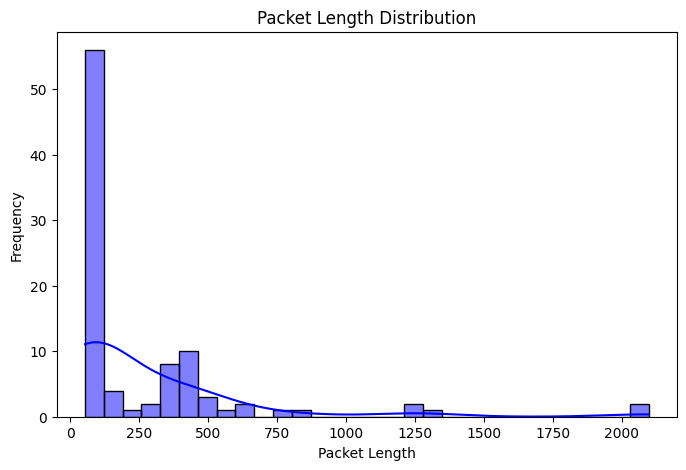

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['length'], bins=30, kde=True, color='blue')
plt.title("Packet Length Distribution")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df['label'] = df['length'].apply(lambda x: 1 if x > 1000 else 0)
print(df['label'].value_counts())  # Count normal vs. attack packets


label
0    89
1     5
Name: count, dtype: int64


In [ ]:
df['label'].value_counts()

,count
label,
0,89
1,5


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['protocol', 'length']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 75, Testing samples: 19


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training complete")


Model training complete


In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         2

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



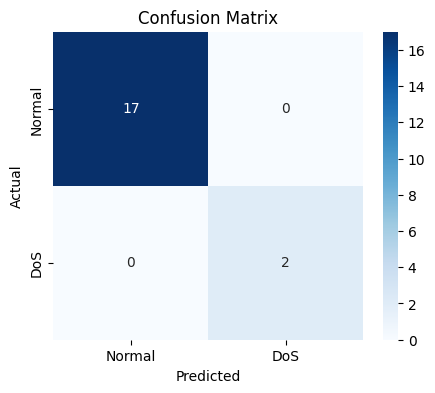

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "DoS"], yticklabels=["Normal", "DoS"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
